In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('car_accident.csv', low_memory=False)

In [3]:
df.head(10)

,ACCIDENT_ID,LOCATE_ID_DISTRICT,LOCATE_ID_POLICE,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,...,GIS_LNG,PERSON_GENDER,PERSON_AGE,PERSON_TYPE,PERSON_STATE,LOCATE_PROVINCE,LOCATE_DOMICILE,LOCATE_AREATYPE,HEALTH_DEADPLACE,HEALTH_EMSSEND
0,1,100298,0,7,14,15000000,0,2,1,90,...,103.848863,1,83,2,1,1040,1040,0,10,50.0
1,2,100298,0,7,14,15000000,0,2,1,90,...,103.848863,1,80,3,1,1040,1040,0,10,40.0
2,3,100856,0,8,14,59000,1,0,4,1,...,99.203276,1,60,2,0,1086,1086,0,0,60.0
3,4,100096,0,11,16,0,1,0,3,1,...,100.731924,1,68,2,0,1023,1023,0,0,20.0
4,5,100323,0,8,16,0,1,0,4,1,...,105.490288,2,10,2,0,1042,1042,0,0,50.0
5,6,100537,0,1,17,52000,1,0,4,1,...,104.584070,2,72,2,0,1055,1055,0,0,50.0
6,7,100537,0,1,17,70000,1,0,4,3,...,104.438689,1,19,3,0,1055,1055,0,0,50.0
7,8,100097,0,10,16,4000000,0,1,4,1,...,100.392493,1,20,3,1,1023,1023,0,10,90.0
8,9,100562,0,10,16,1000000,0,1,1,1,...,99.091865,2,54,2,1,1057,1057,0,30,50.0
9,10,100210,0,11,16,0,0,1,1,90,...,101.822656,1,40,2,1,1035,1035,0,30,60.0


In [4]:
df.isna().sum()

ACCIDENT_ID           0
LOCATE_ID_DISTRICT    0
LOCATE_ID_POLICE      0
ACCIDENT_MONTH        0
ACCIDENT_YEAR         0
ACCIDENT_COST         0
HUMAN_ADMIT           0
HUMAN_DEAD            0
ROADTYPE_ID           0
ROADSKIN_ID           0
ACDPOINT_ID           0
ATMOSPHERE_ID         0
LIGHT_ID              0
GIS_E                 0
GIS_N                 0
GIS_LAT               0
GIS_LNG               0
PERSON_GENDER         0
PERSON_AGE            0
PERSON_TYPE           0
PERSON_STATE          0
LOCATE_PROVINCE       0
LOCATE_DOMICILE       0
LOCATE_AREATYPE       0
HEALTH_DEADPLACE      0
HEALTH_EMSSEND        1
dtype: int64

In [5]:
DoNotUse = ['PERSON_TYPE','PERSON_STATE','LOCATE_PROVINCE','LOCATE_DOMICILE','GIS_N','GIS_LAT','GIS_LNG','GIS_E','ACCIDENT_ID','LOCATE_ID_DISTRICT','LOCATE_ID_POLICE','LOCATE_AREATYPE','HEALTH_DEADPLACE','HEALTH_EMSSEND']
droped_df = df.drop(DoNotUse,axis=1)

In [6]:
droped_df.head()

,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE
0,7,14,15000000,0,2,1,90,3,90,90,1,83
1,7,14,15000000,0,2,1,90,3,90,90,1,80
2,8,14,59000,1,0,4,1,1,1,3,1,60
3,11,16,0,1,0,3,1,1,1,1,1,68
4,8,16,0,1,0,4,1,1,90,2,2,10


In [7]:
droped_df.loc[droped_df['ACCIDENT_YEAR'].astype(int) >= 10, 'ACCIDENT_YEAR'] = '20'+df.ACCIDENT_YEAR.map(str)
droped_df.loc[droped_df['ACCIDENT_YEAR'].astype(int) < 2000, 'ACCIDENT_YEAR'] = '200'+df.ACCIDENT_YEAR.map(str)

droped_df.head()

,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE
0,7,2014,15000000,0,2,1,90,3,90,90,1,83
1,7,2014,15000000,0,2,1,90,3,90,90,1,80
2,8,2014,59000,1,0,4,1,1,1,3,1,60
3,11,2016,0,1,0,3,1,1,1,1,1,68
4,8,2016,0,1,0,4,1,1,90,2,2,10


In [8]:
GENDER = {1: 'Male', 2: 'Female'}
LIGHT = {
    1:"daytime",
    2:"night and light",
    3:"night but no light",
    4:"others",
    90:"not specified",
    0:"not specified"
    }
ROADSKIN = {
    1:"dry",
    2:"wet",
    3:"pothole",
    4:"others",
    90:"not specified",
    0:"not specified"
    }
ACDPOINT = {
    1:"straight way",
    2:"curve",
    3:"crossroad",
    4:"crosswalk",
    5:"barrier",
    6:"others",
    90:"not specified",
    0:"not specified"
    }
ATMOSPHERE = {
    1:"Clear weather",
    2:"foggy",
    3:"smoke and dust.",
    4:"others",
    5:"not specified",
    90:"not specified",
    0:"not specified"
    }

droped_df.PERSON_GENDER = droped_df.PERSON_GENDER.replace(GENDER)
droped_df.ACDPOINT_ID = droped_df.ACDPOINT_ID.replace(ACDPOINT)
droped_df.ATMOSPHERE_ID = droped_df.ATMOSPHERE_ID.replace(ATMOSPHERE)
droped_df.LIGHT_ID = droped_df.LIGHT_ID.replace(LIGHT)
droped_df.ROADSKIN_ID = droped_df.ROADSKIN_ID.replace(ROADSKIN)

In [9]:
droped_df.sample(20)

,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE
62512,12,2008,50000,1,0,1,dry,straight way,not specified,night but no light,Female,31
76248,9,2015,55000,3,0,1,dry,straight way,Clear weather,daytime,Male,16
89659,9,2013,8000000,0,2,1,not specified,not specified,not specified,not specified,Male,16
72804,4,2008,0,4,0,3,dry,curve,Clear weather,daytime,Female,42
23367,4,2005,0,0,0,4,dry,straight way,Clear weather,daytime,Female,16
37872,12,2005,0,0,0,2,dry,straight way,Clear weather,night and light,Male,24
75869,7,2015,55000,1,0,1,dry,crossroad,Clear weather,daytime,Male,17
88167,4,2010,118000,2,0,4,dry,straight way,Clear weather,daytime,Male,18
38319,4,2005,0,0,0,3,dry,crossroad,Clear weather,night and light,Male,21
83388,1,2015,118000,2,0,2,dry,curve,Clear weather,daytime,Male,46


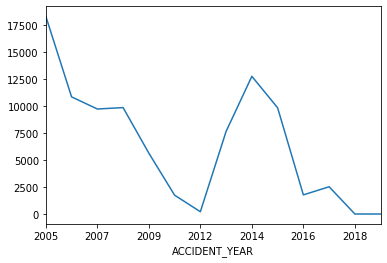

In [10]:
droped_df.groupby(['ACCIDENT_YEAR']).size().plot(kind = "line") 

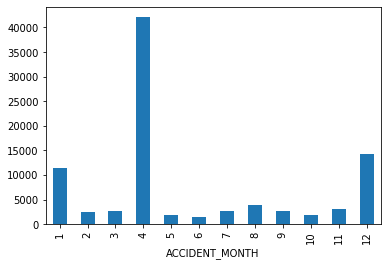

In [11]:
droped_df.groupby(['ACCIDENT_MONTH']).size().plot(kind = "bar") 

In [12]:
droped_df.corr()

,ACCIDENT_MONTH,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,PERSON_AGE
ACCIDENT_MONTH,1.000000,0.024880,0.044036,0.046450,-0.006406,0.016005
ACCIDENT_COST,0.024880,1.000000,0.044121,0.293331,-0.035830,0.055252
HUMAN_ADMIT,0.044036,0.044121,1.000000,0.259488,-0.037218,0.015149
HUMAN_DEAD,0.046450,0.293331,0.259488,1.000000,-0.032401,0.029337
ROADTYPE_ID,-0.006406,-0.035830,-0.037218,-0.032401,1.000000,-0.008940
PERSON_AGE,0.016005,0.055252,0.015149,0.029337,-0.008940,1.000000


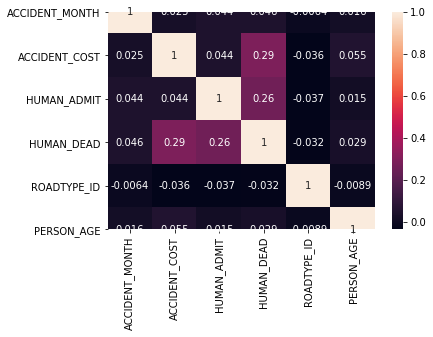

In [13]:
sns.heatmap(droped_df.corr(),annot=True)

In [14]:
droped_df.groupby(['PERSON_GENDER']).size()

PERSON_GENDER
Female    24912
Male      66078
dtype: int64

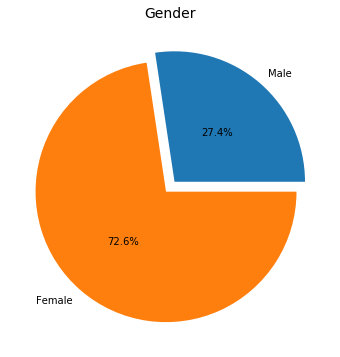

In [15]:
gender_data = droped_df.groupby(['PERSON_GENDER']).size()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=gender_data, autopct="%.1f%%", explode=[0.05]*2, labels=["Male","Female"], pctdistance=0.5)
plt.title("Gender", fontsize=14);

In [16]:
roadskin_data = droped_df.groupby(['ROADSKIN_ID']).size()
roadskin_data

ROADSKIN_ID
dry              74058
not specified     6881
others              69
pothole           3682
wet               6300
dtype: int64

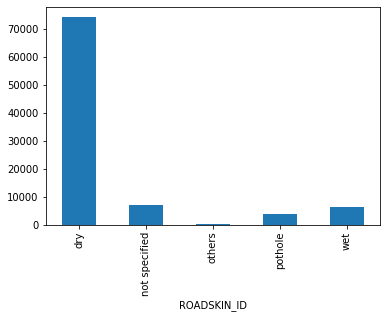

In [17]:
droped_df.groupby(['ROADSKIN_ID']).size().plot(kind = "bar") 

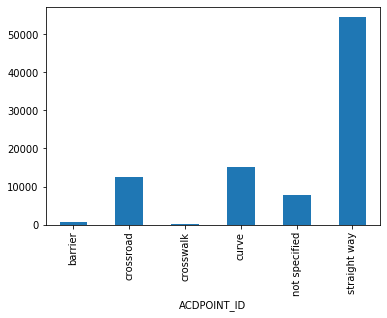

In [18]:
droped_df.groupby(['ACDPOINT_ID']).size().plot(kind = "bar") 

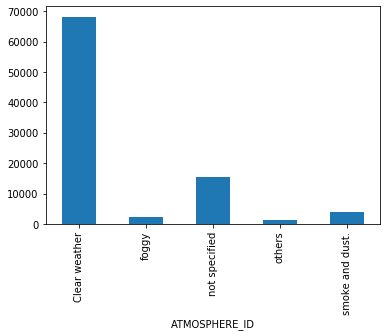

In [19]:
droped_df.groupby(['ATMOSPHERE_ID']).size().plot(kind = "bar") 

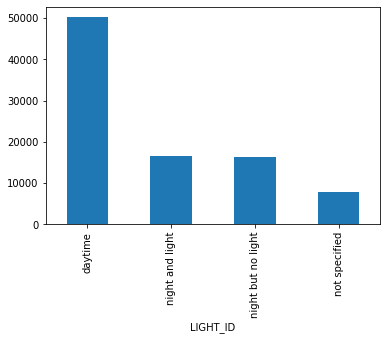

In [20]:
droped_df.groupby(['LIGHT_ID']).size().plot(kind = "bar") 

In [51]:
prayut = droped_df.loc[droped_df['ACCIDENT_YEAR'] == '2017']
prayut


,ACCIDENT_MONTH,ACCIDENT_YEAR,ACCIDENT_COST,HUMAN_ADMIT,HUMAN_DEAD,ROADTYPE_ID,ROADSKIN_ID,ACDPOINT_ID,ATMOSPHERE_ID,LIGHT_ID,PERSON_GENDER,PERSON_AGE
5,1,2017,52000,1,0,4,dry,straight way,Clear weather,daytime,Female,72
6,1,2017,70000,1,0,4,pothole,crossroad,Clear weather,daytime,Male,19
21,4,2017,100,1,0,4,dry,crossroad,Clear weather,daytime,Female,29
22,4,2017,500,2,0,1,dry,crossroad,Clear weather,daytime,Female,56
23,4,2017,500,2,0,1,dry,crossroad,Clear weather,daytime,Female,65
...,...,...,...,...,...,...,...,...,...,...,...,...
12437,4,2017,2000,1,0,4,dry,straight way,Clear weather,daytime,Male,64
12438,4,2017,1000000,1,0,1,dry,crossroad,Clear weather,daytime,Female,33
12439,4,2017,1000,1,0,2,dry,straight way,Clear weather,daytime,Male,24
12440,4,2017,2000,1,0,2,dry,crossroad,Clear weather,daytime,Female,29


In [52]:
# prayut.groupby(['ACCIDENT_MONTH']).size

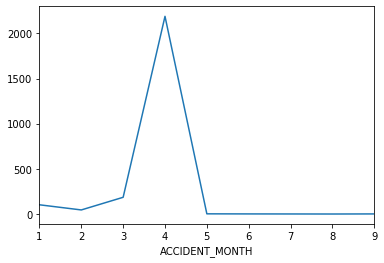

In [53]:
prayut.groupby(['ACCIDENT_MONTH']).size().plot(kind = "line") 